# ***Open Food Facts : nettoyage des données pour analyses***

Le nettoyage des données de ce dataset va être effectué pour deux raisons différentes :


*   effectuer des analyses à présenter à un grand public qui portent sur le sujet de la nutrition,
*   et que le dataset soit utilisable pour une application dont l'élément central soit le nutriscore des produits.

Les analyses à présenter au grand public porteront sur les données nutritionelles des produits et d'autres informations telles que le nombre d'additifs.

L'application imaginée est une application qui attriburait une note à liste des produits scannées (via leur code barre) en fonction du nutriscore de chacun des produits. Elle pourrait également servir à afficher les informations nutritionelles basiques du produit scanné au même titre que l'étiquette. 

Il est donc impératif de récuperer le plus d'informations nutritionnelles possibles concernant chaque produit.



# ***Table des matières :***



*   Partie 1 : comprendre le dataset
*   Partie 2 : réduction des colonnes
*   Partie 3 : réduction des lignes
*   Partie 4 : informations nutritionelles et nutriscore
*   Partie 5 : utilisation de la catégorie du produit
*   Partie 6 : valeurs aberrantes
*   Partie 7 : completer les NAN



**Imports et versions :**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mtl
import seaborn as sns
import pandas as pd
import missingno as msno

In [ ]:
print("numpy version :", np.__version__)
print("matplotlib version :", mtl.__version__)
print("seaborn version :", sns.__version__)
print("pandas version :",pd.__version__)
print("msno version :",msno.__version__)

numpy version : 1.21.6
matplotlib version : 3.2.2
seaborn version : 0.11.2
pandas version : 1.3.5
msno version : 0.5.1


# **Partie 1 : comprendre le dataset**

**Chargement du dataset**

In [ ]:
df = pd.read_csv("drive/MyDrive/CSV/fr.openfoodfacts.org.products.csv", sep="\t")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Taille du dataset :**

In [ ]:
print("DataFrame shape :", df.shape)
print("DataFrame cells :", df.shape[0]*df.shape[1])

DataFrame shape : (320772, 162)
DataFrame cells : 51965064


**Liste des colonnes :**

In [ ]:
df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

**Type de chaque colonne :**

In [ ]:
df.dtypes

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 162, dtype: object

**Remplissage de chaque colonne :**

In [ ]:
df.isna().mean()

code                       0.000072
url                        0.000072
creator                    0.000006
created_t                  0.000009
created_datetime           0.000028
                             ...   
carbon-footprint_100g      0.999165
nutrition-score-fr_100g    0.310382
nutrition-score-uk_100g    0.310382
glycemic-index_100g        1.000000
water-hardness_100g        1.000000
Length: 162, dtype: float64

Text(0.5, 1.0, 'column fill %')

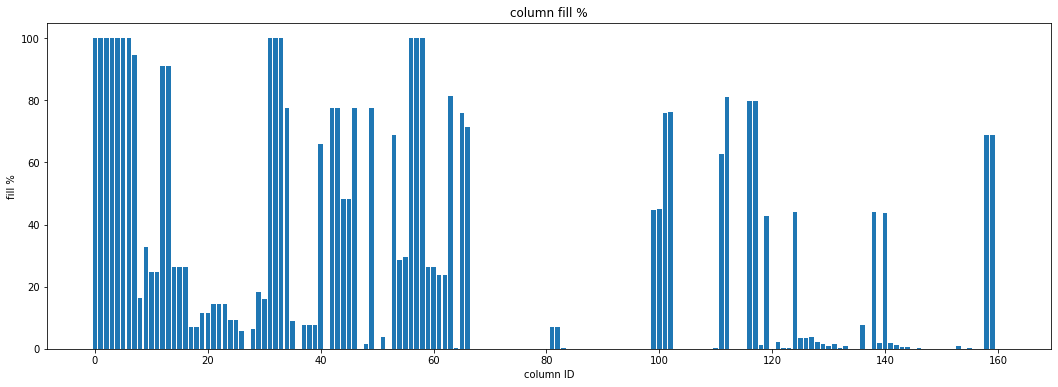

In [ ]:
plt.figure(figsize=(18,6))
plt.bar([i for i in range(df.shape[1])], 100*(1-df.isna().mean()))
plt.xlabel('column ID')
plt.ylabel('fill %')
plt.title('column fill %')

<b>Remplissage du dataset complet :</b>

In [ ]:
print( '% de valeurs manquantes :', df.isna().sum().sum()/(df.shape[0]*df.shape[1]))

% de valeurs manquantes : 0.7622157263195134


**Colonnes les plus remplies :**

In [ ]:
fill = 1-df.isna().mean()
fill[fill > 0.5]

code                                       0.999928
url                                        0.999928
creator                                    0.999994
created_t                                  0.999991
created_datetime                           0.999972
last_modified_t                            1.000000
last_modified_datetime                     1.000000
product_name                               0.944627
brands                                     0.911426
brands_tags                                0.911401
countries                                  0.999127
countries_tags                             0.999127
countries_fr                               0.999127
ingredients_text                           0.776134
serving_size                               0.658820
additives_n                                0.776062
additives                                  0.775956
ingredients_from_palm_oil_n                0.776062
ingredients_that_may_be_from_palm_oil_n    0.776062
nutrition_gr

**Colonnes vides :**

In [ ]:
fill[fill==0]

no_nutriments                            0.0
ingredients_from_palm_oil                0.0
ingredients_that_may_be_from_palm_oil    0.0
nutrition_grade_uk                       0.0
butyric-acid_100g                        0.0
caproic-acid_100g                        0.0
lignoceric-acid_100g                     0.0
cerotic-acid_100g                        0.0
melissic-acid_100g                       0.0
elaidic-acid_100g                        0.0
mead-acid_100g                           0.0
erucic-acid_100g                         0.0
nervonic-acid_100g                       0.0
chlorophyl_100g                          0.0
glycemic-index_100g                      0.0
water-hardness_100g                      0.0
dtype: float64

**Colonnes peu remplies :**

In [ ]:
fill[fill<0.5].count()

128

In [ ]:
fill[fill<0.2].count()

108

In [ ]:
fill[(fill<0.5)&(fill>0.1)].sort_values(ascending=False)

additives_tags               0.482212
additives_fr                 0.482212
cholesterol_100g             0.449198
trans-fat_100g               0.446729
calcium_100g                 0.439720
vitamin-c_100g               0.439150
iron_100g                    0.437887
vitamin-a_100g               0.428822
quantity                     0.326771
pnns_groups_2                0.294574
pnns_groups_1                0.285290
categories_fr                0.263150
categories                   0.263146
categories_tags              0.263081
main_category                0.263009
main_category_fr             0.263009
packaging_tags               0.246159
packaging                    0.246156
image_small_url              0.236417
image_url                    0.236417
purchase_places              0.181415
generic_name                 0.164587
stores                       0.161242
labels_fr                    0.145480
labels_tags                  0.145412
labels                       0.145147
manufacturin

In [ ]:
fill[(fill<0.1)&(fill!=0)].sort_values(ascending=False)

emb_codes             0.091361
emb_codes_tags        0.091351
allergens             0.088362
potassium_100g        0.077151
traces                0.075920
                        ...   
caprylic-acid_100g    0.000003
myristic-acid_100g    0.000003
palmitic-acid_100g    0.000003
stearic-acid_100g     0.000003
montanic-acid_100g    0.000003
Length: 84, dtype: float64

**Doublons :**

In [ ]:
df.duplicated().sum()

0

**Produits listés :**

In [ ]:
print("Nombre de produits :", df['product_name'].count())
print("Nombre de noms de produits :", df['product_name'].nunique())

Nombre de produits : 303010
Nombre de noms de produits : 221347


# **Partie 2 : réduction des colonnes**

Une réduction des colonnes peut être effectuée puisque certaines des colonnes ne proposent pas d'informations utiles aux problématiques fixées. C'est le cas par exemple pour :


*   l'url du produit sur le site
*   les dates de création et dernière modification de la fiche du produit
*   le magasin dans lequel le produit a été acheté
*   etc ...

On fait attention tout de même à ne pas supprimer des colonnes qui permenttent de calculer le nutriscore.


**Suppression des colonnes non utiles à la problématique :**

In [ ]:
useless_col = ['url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 
               'packaging', 'packaging_tags', 'image_small_url', 'image_url', 'purchase_place', 'stores', 
               'manufacturing_places', 'manufacturing_places_tags', 'emb_codes', 'emb_codes_tags', 
               'states', 'states_tags', 'states_tags_fr', 'states_fr']
df = df.loc[:,~df.columns.isin(useless_col)]

**Suppression des colonnes totalement vides et quasi vides (<10%) :** Certaines colonnes sont totalement vides, et malgré qu'elles pourraient être intéréssantes pour l'analyse, il est tout bonnement impossible des les remplire avec les informations à disposition. De même pour certaines colonnes quasiment vides.

*Attention une colonne permettant le calcul du nutriscore fait partie de ces colonnes très peu remplies, on fait attention donc à ne pas la supprimer.*

In [ ]:
empty_cols = fill[fill<0.1].index.values.tolist()
empty_cols.remove('fruits-vegetables-nuts_100g')
df = df.loc[:,~df.columns.isin(empty_cols)]

**Suppression des colonnes assez vides difficelement remplissables et non-indipensables (seuil < 40%):** Certaines colonnes sont très peu remplies et peuvent être dificilement remplisables. De plus elles ne sont pas forcément indispensables pour une analyse nutritionnelle basique à présenter au grand publique.

In [ ]:
fill = 1-df.isna().mean()
quasi_empty_cols = fill[(fill<0.4)&(fill>=0.1)]
quasi_empty_cols

generic_name        0.164587
quantity            0.326771
categories          0.263146
categories_tags     0.263081
categories_fr       0.263150
labels              0.145147
labels_tags         0.145412
labels_fr           0.145480
purchase_places     0.181415
pnns_groups_1       0.285290
pnns_groups_2       0.294574
main_category       0.263009
main_category_fr    0.263009
dtype: float64

In [ ]:
quasi_empty_cols = ['quantity', 'purchase_places', 'labels', 'labels_tags', 'labels_fr']
df = df.loc[:,~df.columns.isin(quasi_empty_cols)]

**Autres colonnes :** certaines colonnes permettraient de faire des analyses un peu plus poussées par la suite cependant ce n'est pas l'intérêt de la problématique, que ce soit pour l'application ou l'analyse pour le grand public. On enlève alors ces colonnes en question.

In [ ]:
other_cols = ['additives', 'additives_tags', 'additives_fr', 'ingredients_that_may_be_from_palm_oil_n', 'brands',
              'trans-fat_100g', 'cholesterol_100g']
df = df.loc[:,~df.columns.isin(other_cols)]

**Colonnes doublon :** Certaines colonnes apportent la même information mais en de façon différentes, on garde seulement la plus exploitable. 

In [ ]:
double_cols = ['countries', 'countries_fr', 'categories', 'categories_fr', 'main_category_fr']
df = df.loc[:,~df.columns.isin(double_cols)]

**Réoganisation des colonnes :**

In [ ]:
df = df[['code', 'product_name', 'brands_tags', 'countries_tags',
         'generic_name', 'categories_tags', 'main_category', 'pnns_groups_1', 'pnns_groups_2',
         'ingredients_text', 'serving_size', 'additives_n', 'ingredients_from_palm_oil_n',
         'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
         'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
         'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g',
         'iron_100g', 'fruits-vegetables-nuts_100g', 'nutrition-score-fr_100g',
         'nutrition-score-uk_100g', 'nutrition_grade_fr']]

**Etat des lieux du dataset :**

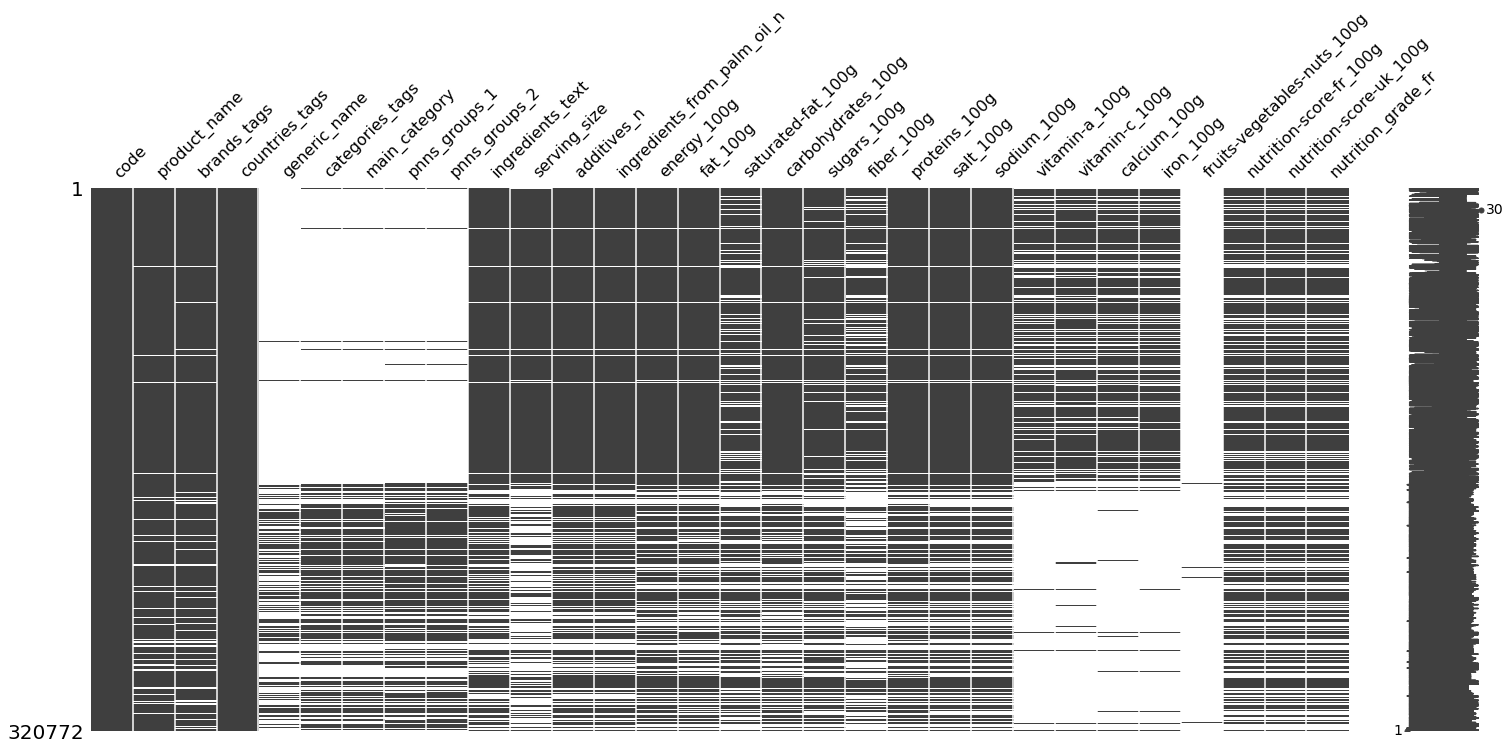

In [ ]:
msno.matrix(df)

Text(0.5, 1.0, 'column fill %')

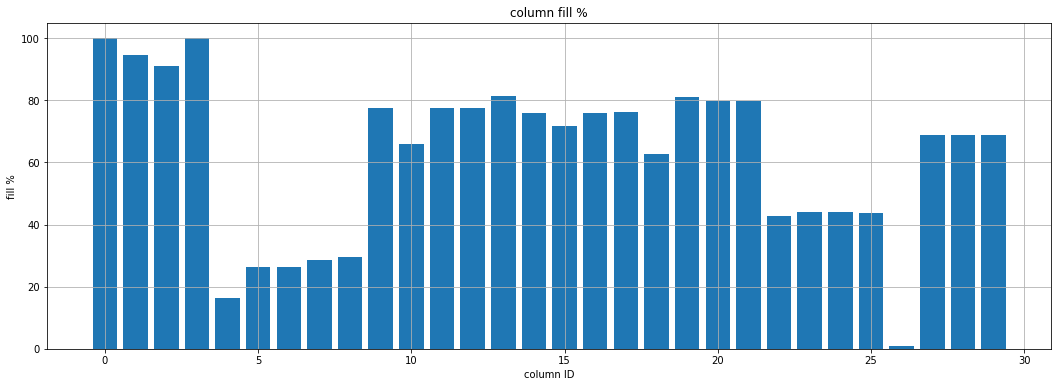

In [ ]:
plt.figure(figsize=(18,6))
plt.bar([i for i in range(df.shape[1])], 100*(1-df.isna().mean()))
plt.grid()
plt.xlabel('column ID')
plt.ylabel('fill %')
plt.title('column fill %')

In [ ]:
print("% cellules vides :", df.isna().sum().sum()/(df.shape[0]*df.shape[1]))

% cellules vides : 0.3740283856861987


# **Partie 3 : réduction des lignes**

On va simplement supprimer les lignes qui ne sont d'aucune utilité dans notre dataset, autrement dit les lignes qui ne possèdent pas d'informations suffisantes afin d'êtres utiles à l'analyse ou l'application. 

C'est à dire les lignes où les informations suivantes sont manquantes : product_name, enrgy_100g, fat_100g, saturated_fat_100g, carbohydrates_100g, sugars_100g, proteins_100g, fiber_100g, salt_100g et les nutriscores.
On choisit un 

In [ ]:
cols = ['product_name', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 
        'sugars_100g', 'proteins_100g', 'fiber_100g', 'salt_100g', 
        'nutrition_grade_fr', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g']
df = df.dropna(subset=cols, thresh=5)
print("% cellules vides :", df.isna().sum().sum()/(df.shape[0]*df.shape[1]))

% cellules vides : 0.27514220181137716


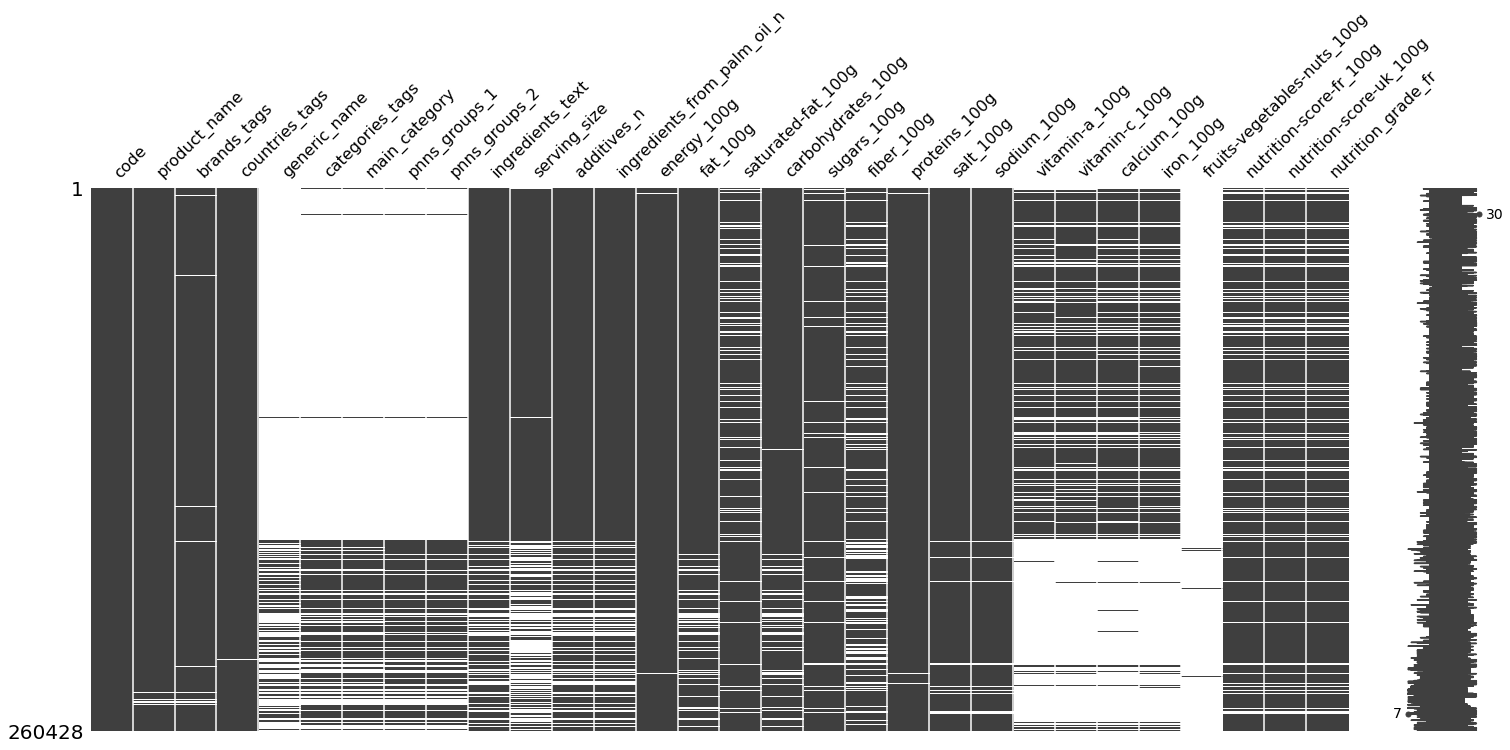

In [ ]:
msno.matrix(df)

Text(0.5, 1.0, 'column fill %')

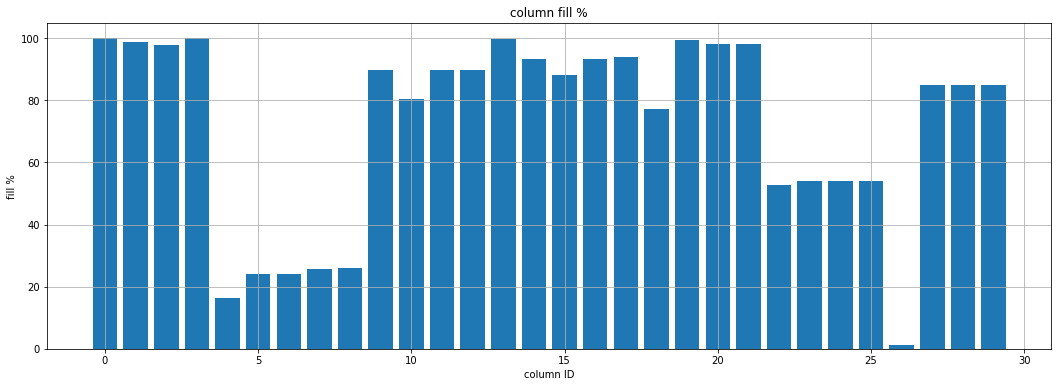

In [ ]:
plt.figure(figsize=(18,6))
plt.bar([i for i in range(df.shape[1])], 100*(1-df.isna().mean()))
plt.grid()
plt.xlabel('column ID')
plt.ylabel('fill %')
plt.title('column fill %')

# **Partie 4 : informations nutritionelles et nutriscore**

Dans un premier temps on va analyser les colonnes utiles au calcul au nutriscore et ce dernier. 
Le but étant d'éssayer de remplir au maximum ces colonnes à la fois pour l'application et à la fois pour les analyses à suivre. 

**Formule du nutriscore :**

Posons les notations suivantes :


*   $e$ : energie en kJ pour 100g
*   $s$ : sucre en g pour 100g
*   $g$ : graisses saturées en g pour 100g
*   $n$ : sodium en g pour 100g
*   $p$ : proteines en g pour 100g
*   $f$ : fibres en g pour 100g
*   $v$ : quantité de fruits/légumes/noix en g pour 100g

Pour chacune de ces quantités on fixe une fonction qui attribue un score à chacune : 
$$S_e(e), S_s(s), S_g(g), S_n(n), S_p(p), S_f(f), S_v(v)$$

Puis ensuite on calcule le nutriscore à l'aide de ces fonctions en questions :
$$N(e,s,g,n,p,f,v) = S_e(e)+S_s(s) + S_g(g)+S_n(n)-S_p(p)-S_f(f)-S_v(v) $$

On s'interesse donc plus particulièrement à la manière de remplire les colonnes permetant le calcul du nutriscore, mais également dans un second temps à celle qui nous indiquent le type de produit auquel nous avons à faire. 

In [ ]:
nutri_cols = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'sugars_100g', 'salt_100g',
              'sodium_100g','fiber_100g', 'proteins_100g', 'fruits-vegetables-nuts_100g',
              'nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'nutrition_grade_fr']
nutri_calc = ['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'sodium_100g',
              'fiber_100g', 'proteins_100g', 'fruits-vegetables-nuts_100g',
              'nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'nutrition_grade_fr']

**Comparaison de la colonne Sodium et Sel :** La colonne du sodium (utile au calcul du nutriscore) est directement liée avec celle du sel. On vérifie si c'est deux colonnes possèdent autant d'informations, dans le cas contraire on essaierai de remplire les colonne du sodium à l'aide de celle du sel :

$$\text{Teneur en sodium du sel} = \frac{\text{Masse molaire du sodium}}{\text{Somme masses molaire du sodium et chlore}} = \frac{M(\text{Na})}{M(\text{Na})+M(\text{Cl})}=0.393 $$

On se sert de la colonne de sel pour remplir les NaN de la colonne de sel quand c'est possible simplement en multipliant la valeur en sel par 0.393. Et inversement en divisant par 0.393.



In [ ]:
print("Nombre de valeurs de sodium remplies avant :", df['sodium_100g'].count())
df.loc[df['sodium_100g'].isnull(), 'sodium_100g'] = df.loc[df['sodium_100g'].isnull(), 'salt_100g']*0.393
print("Nombre de valeurs remplies après :", df['sodium_100g'].count())

Nombre de valeurs de sodium remplies avant : 255159
Nombre de valeurs remplies après : 255199


In [ ]:
print("Nombre de valeurs de sel remplies avant :", df['salt_100g'].count())
df.loc[df['salt_100g'].isnull(), 'salt_100g'] = df.loc[df['salt_100g'].isnull(), 'sodium_100g']/0.393
print("Nombre de valeurs remplies après :", df['salt_100g'].count())

Nombre de valeurs de sel remplies avant : 255199
Nombre de valeurs remplies après : 255199


**Comparaison colonnes du nutriscore uk et fr :** on peut s'interesser au deux colonnes des nutriscores uk et fr. Les deux score sont sensés être identiques puisque c'est le même score calculé de la même façon. On peut donc remplir les cases vides du nutriscore fr avec les valeurs du nutriscore uk s'il y en a et inversement. 

*Finalement toutes les lignes possédant un nutriscore fr possèdent un nutriscore uk et inversement*

In [ ]:
print("Nombre de valeurs de nutriscore uk remplies avant :", df['nutrition-score-uk_100g'].count())
df.loc[df['nutrition-score-uk_100g'].isnull(), 'nutrition-score-uk_100g'] = df.loc[df['nutrition-score-uk_100g'].isnull(), 'nutrition-score-fr_100g']
print("Nombre de valeurs remplies après :", df['nutrition-score-uk_100g'].count())

Nombre de valeurs de nutriscore uk remplies avant : 221019
Nombre de valeurs remplies après : 221019


In [ ]:
print("Nombre de valeurs de nutriscore fr remplies avant :", df['nutrition-score-fr_100g'].count())
df.loc[df['nutrition-score-fr_100g'].isnull(), 'nutrition-score-fr_100g'] = df.loc[df['nutrition-score-fr_100g'].isnull(), 'nutrition-score-uk_100g']
print("Nombre de valeurs remplies après :", df['nutrition-score-fr_100g'].count())

Nombre de valeurs de nutriscore fr remplies avant : 221019
Nombre de valeurs remplies après : 221019


**Comparaison des valeurs des deux nutriscores :** Regardons s'il y a des différences entre les deux colonnes. Auquel cas un traitement s'impose. 

In [ ]:
print('Nombres de valeurs dans les colonnes :', df[['nutrition-score-fr_100g', 'nutrition-score-uk_100g']].dropna(axis=0, how='all').count().mean())
print('Nombre de valeurs qui ne coincident pas :', df[['nutrition-score-fr_100g', 'nutrition-score-uk_100g']].dropna(axis=0, how='all').loc[df['nutrition-score-fr_100g']!=df['nutrition-score-uk_100g']].count().mean())

Nombres de valeurs dans les colonnes : 221019.0
Nombre de valeurs qui ne coincident pas : 8320.0


Un pourcentage très faible des valeurs ont nutriscores différents. Le nutriscore étant très difficilement calculable due à l'extrêmement faible remplissage d'une des colonne nécéssaires à son calcul, j'attribue aux produits qui ont des nutriscores différents en uk et fr la moyenne des valeurs que l'on a. 

In [ ]:
df['nutriscore'] = (df['nutrition-score-fr_100g']+df['nutrition-score-uk_100g'])/2
df = df.drop(columns=['nutrition-score-fr_100g', 'nutrition-score-uk_100g'])

**Comparaison entre nutriscore et nutrition_grade_fr :** le nutriscore donne le résultat numérique du calcul du nutriscore, alors que nutrition_grade_fr donne le nutriscore avec la correspondance alphabétique. On regarde s'il est possible de completer l'une des colonnes avec l'autre. 

In [ ]:
df[['nutriscore', 'nutrition_grade_fr']].dropna(how='all').count()

nutriscore            221019
nutrition_grade_fr    221019
dtype: int64

<b>Etat des lieux du remplissage pour les colonnes associées au nutriscore: </b>  

Text(0.5, 1.0, 'column fill %')

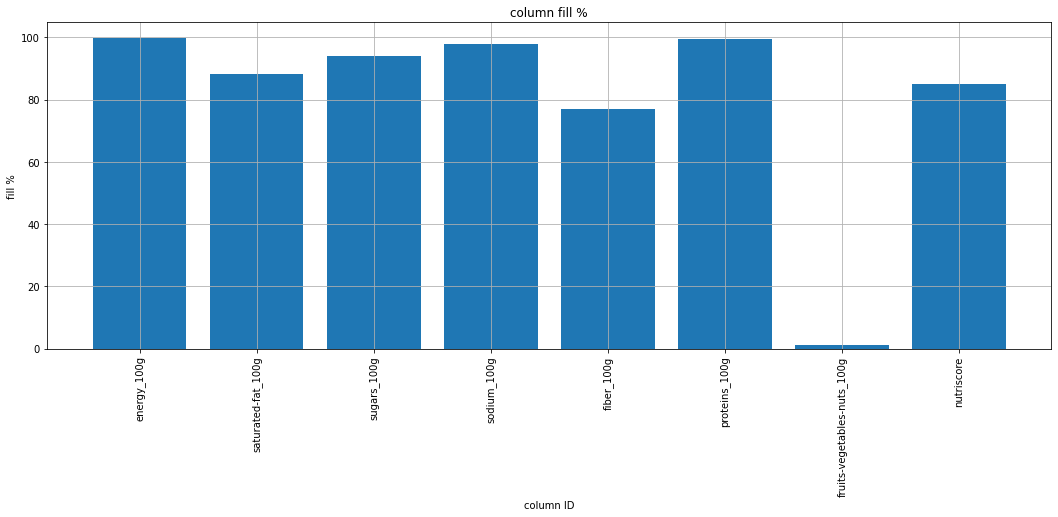

In [ ]:
nutri_calc = ['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'sodium_100g',
              'fiber_100g', 'proteins_100g', 'fruits-vegetables-nuts_100g', 'nutriscore']
plt.figure(figsize=(18,6))
plt.xticks(rotation='vertical')
plt.bar(nutri_calc, 100*(1-df[nutri_calc].isna().mean()))
plt.xlabel('column ID')
plt.ylabel('fill %')
plt.grid()
plt.title('column fill %')

# **Partie 5 : utilisation de la catégorie des produits**

S'intéresser à la catégorie des produits permettra de connaitre les informations nutritionelles typiques pour chaque groupe de produit. 
De ce fait, on pourra alors remplir les information nutritionelles manquantes d'un produit par les information nutritionelles du groupe auquel il appartient. 

Regardons les colonnes qui donnent des information sur la catégorie du produit.

In [ ]:
categs = ['product_name', 'generic_name', 'categories_tags', 'main_category', 'pnns_groups_1', 'pnns_groups_2']

In [ ]:
df[categs].dropna(axis=0, how='any').head(10)

,product_name,generic_name,categories_tags,main_category,pnns_groups_1,pnns_groups_2
174,Salade Cesar,Laitue en salade,"en:plant-based-foods-and-beverages,en:plant-ba...",en:fresh-vegetables,Fruits and vegetables,Vegetables
175,Danoises à la cannelle roulées,Pâtisserie,"en:sugary-snacks,en:biscuits-and-cakes,en:past...",en:pastries,Sugary snacks,Biscuits and cakes
180,Chaussons tressés aux pommes,Pâtisserie,"en:sugary-snacks,en:biscuits-and-cakes,en:past...",en:pastries,Sugary snacks,Biscuits and cakes
181,Pain Burger Artisan,Pain,fr:boulange,fr:boulange,unknown,unknown
185,Quiche Lorraine,Quiche lorraine,"en:meals,en:pizzas-pies-and-quiches,en:quiches...",en:meals,Composite foods,Pizza pies and quiche
186,Pâté au poulet,Pâté à la viande,"en:meats,en:poultries,en:chickens,en:cooked-ch...",en:poultries,Fish Meat Eggs,Meat
218,Belgische Pralinen,Pralinenmischung,"en:plant-based-foods-and-beverages,en:plant-ba...",en:plant-based-foods-and-beverages,Sugary snacks,Sweets
226,"Pepsi, Nouveau goût !",Boisson gazeuse rafraîchissante aux extraits n...,"en:beverages,en:carbonated-drinks,en:sodas,en:...",en:sodas,Beverages,Sweetened beverages
236,Cauliflower,Cauliflower,"en:plant-based-foods-and-beverages,en:plant-ba...",en:fresh-vegetables,Fruits and vegetables,Vegetables
239,Salsa de mostaza,Salsa de mostaza,"en:groceries,en:condiments,en:sauces,en:mustards",en:condiments,Fat and sauces,Dressings and sauces


In [ ]:
df[categs].count()

product_name       257326
generic_name        42917
categories_tags     62914
main_category       62914
pnns_groups_1       67267
pnns_groups_2       67416
dtype: int64

In [ ]:
df[categs].nunique()

product_name       185774
generic_name        32162
categories_tags     16103
main_category        2317
pnns_groups_1          14
pnns_groups_2          42
dtype: int64

In [ ]:
(df[categs].nunique()/df[categs].count()).sort_values(ascending=False)

generic_name       0.749400
product_name       0.721940
categories_tags    0.255953
main_category      0.036828
pnns_groups_2      0.000623
pnns_groups_1      0.000208
dtype: float64

Afin de classifier les produits avec le moins de biais possible, on va utiliser une catégorisation très spécifique pour remplir les informations nutritionelles manquantes de certains produits par celle du groupe auquel il appartient. 
Cependant on va éviter les catégorisation trop spécifiques pour pas introduire trop d'erreurs de variance. 

On va utiliser 'categories_tags' puis 'main_category' puis les deux pnns groups.

On utilise la médianne dans le cas où il existerait beacoup de valeurs abérantes.

**Utilisation de categories:**

In [ ]:
liste = df['categories_tags'].dropna().unique()
for m in liste:
  medians = df.loc[df['categories_tags']==m, nutri_calc].median()
  for col in nutri_calc:
    df.loc[(df['categories_tags']==m)&(df[col].isna()), col] = medians.loc[col]

**Utilisation de main_category :**

In [ ]:
liste = df['main_category'].dropna().unique()
for m in liste:
  medians = df.loc[df['main_category']==m, nutri_calc].median()
  for col in nutri_calc:
    df.loc[(df['main_category']==m)&(df[col].isna()), col] = medians.loc[col]

**Utilisation de pnns_groups_2 :**

In [ ]:
liste = df['pnns_groups_2'].dropna().unique()
for m in liste:
  medians = df.loc[df['pnns_groups_2']==m, nutri_calc].median()
  for col in nutri_calc:
    df.loc[(df['pnns_groups_2']==m)&(df[col].isna()), col] = medians.loc[col]

**Utilisation de pnns_groups_1 :**

In [ ]:
liste = df['pnns_groups_1'].dropna().unique()
for m in liste:
  medians = df.loc[df['pnns_groups_1']==m, nutri_calc].median()
  for col in nutri_calc:
    df.loc[(df['pnns_groups_1']==m)&(df[col].isna()), col] = medians.loc[col]

**Etat des lieux du remplissage du dataset :**

Text(0.5, 1.0, 'column fill %')

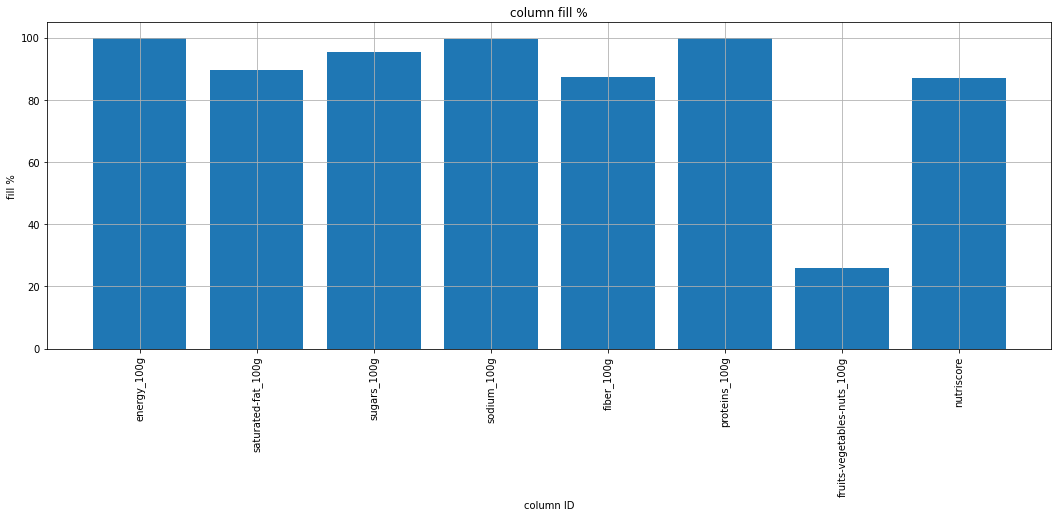

In [ ]:
plt.figure(figsize=(18,6))
plt.xticks(rotation='vertical')
plt.bar(nutri_calc, 100*(1-df[nutri_calc].isna().mean()))
plt.xlabel('column ID')
plt.ylabel('fill %')
plt.grid()
plt.title('column fill %')

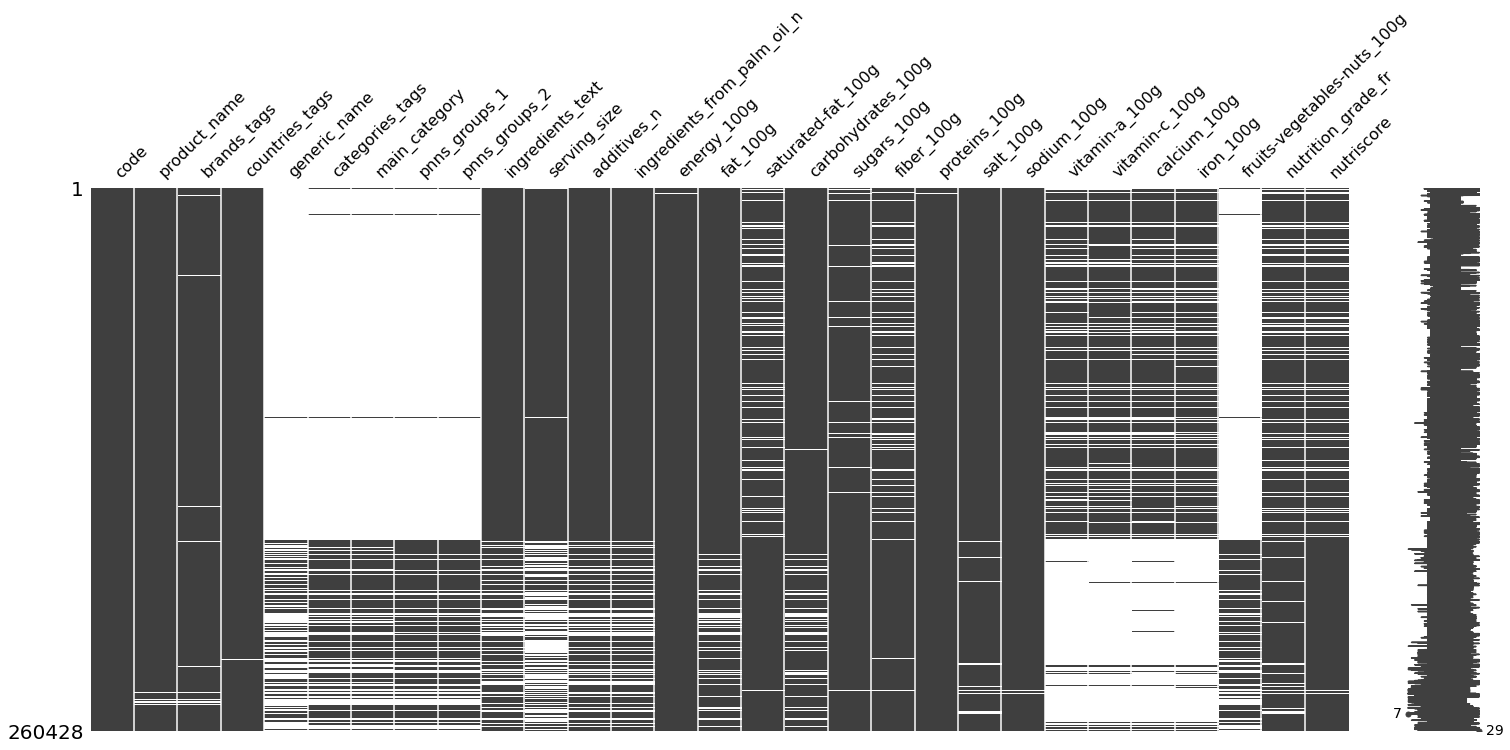

In [ ]:
msno.matrix(df)

% de cases vides dans les colonnes nutritionelles :

In [ ]:
df[nutri_calc].isna().sum().sum()/(df[nutri_calc].shape[0]*df[nutri_calc].shape[1])

0.1447900187383845

*Export et réimport du dataframe obtenu (uniquement pour ne pas attendre les temps de calculs précédents pour attaquer la partie 6 après extinction du service Google Colab).*

In [ ]:
df.to_csv("drive/MyDrive/CSV/open_food_facts.csv")

In [ ]:
df = pd.read_csv("drive/MyDrive/CSV/open_food_facts.csv", sep=",", index_col=0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# **Partie 6 : valeurs aberrantes**

Regardons s'il y a des valeurs aberrantes dans le dataset avant de completer les NaN. Déjà c'est impossible d'avoir des valeurs négatives pour les valeurs nutritionelles (à part le nutriscore). Et certaines valeurs ne peuvent pas dépasser 100 pour les valeurs nutritionelle 100g (toutes sauf l'énergie). 


**Remplacement de toutes les valeurs nutritionelles négatives par 0 :**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


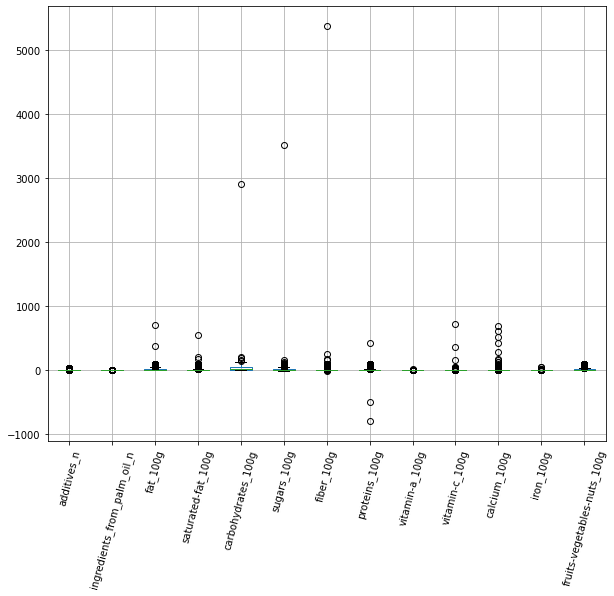

In [ ]:
df.boxplot(column=['additives_n', 'ingredients_from_palm_oil_n', 'fat_100g', 'saturated-fat_100g', 
                   'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'vitamin-a_100g', 
                   'vitamin-c_100g', 'calcium_100g', 'iron_100g', 'fruits-vegetables-nuts_100g'], 
           rot=75, 
           figsize=(10,8))

In [ ]:
cols = ['additives_n', 'ingredients_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g',
       'vitamin-c_100g', 'calcium_100g', 'iron_100g',
       'fruits-vegetables-nuts_100g']
for col in cols:
  df.loc[df[col]<0, col] = 0

**Remplacement des valeurs nutritionelles superieures à 100 par 100 :** (sauf energy_100g)

In [ ]:
cols=[ 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g',
       'vitamin-c_100g', 'calcium_100g', 'iron_100g',
       'fruits-vegetables-nuts_100g', 'fat_100g']
for col in cols:
  df.loc[df[col]>100, col] = 100

In [ ]:
df.describe()

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,fruits-vegetables-nuts_100g,nutriscore
count,233911.000000,233911.000000,2.600810e+05,242768.000000,233504.000000,242780.000000,248589.000000,226966.000000,259647.000000,255199.000000,258847.000000,137528.000000,140792.000000,140816.000000,140425.000000,67416.000000,226715.000000
mean,1.998474,0.019589,1.142328e+03,12.682186,5.092722,32.078233,15.865967,2.680971,7.072134,1.643377,0.653973,0.000396,0.014684,0.107999,0.003650,17.640359,9.068723
std,2.516659,0.140299,6.459575e+03,17.448114,7.886171,29.139121,21.101159,4.416107,8.148725,6.658607,2.858640,0.073285,0.557822,0.988140,0.214435,31.642317,9.063326
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,0.000000,0.000000,3.770000e+02,0.000000,0.000000,6.000000,1.300000,0.000000,0.700000,0.063500,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,1.100000e+03,5.000000,1.790000,20.710000,5.560000,1.400000,4.760000,0.584200,0.229000,0.000000,0.000000,0.035000,0.001010,0.000000,9.000000
75%,3.000000,0.000000,1.674000e+03,20.000000,7.140000,58.330000,23.640000,3.500000,10.000000,1.376680,0.538000,0.000107,0.003700,0.106000,0.002400,15.000000,16.000000
max,31.000000,2.000000,3.251373e+06,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,26.700000,100.000000,100.000000,50.000000,100.000000,40.000000


**Valeurs aberantes de energy_100g :** le max d'energie possible est 900 kcal pour 100g, ce qui correpsond à 3,765,690 J ou 3,765 kJ. Toutes les valeurs au dela sont impossibles. Donc on les descend à 900. 
Au vu de la valeurs des quartiles de la colonne energy_100g, on déduit que l'unité de la colonne est le kJ, donc toutes les valeurs au dela de 3765 kJ sont des valeurs aberantes que l'on redescendra à 3756.

In [ ]:
df.loc[df['energy_100g']>3756, 'energy_100g'] = 3765

# **Partie 7 : Completer les NaN**


**Remplissage des colonnes textuelles par unknown :**

In [ ]:
text_cols = ['product_name', 'brands_tags', 'countries_tags', 'ingredients_text', 'serving_size']
df[text_cols] = df[text_cols].fillna('unknown')

**Remplacer les valeurs manquantes catégorielles par unknown :** on remplace tous les cases de catégories manquantes par unknown pour les colonnes pnns_group_1 et pnns_groupe_2, on supprime les autres colonnes catégorielles car c'est celles qui sont le moins remplies (et elles sont plus spécifiques donc moins propices à une aamyse générale)

In [ ]:
categs = ['pnns_groups_1', 'pnns_groups_2']
df[categs] = df[categs].fillna('unknown')
df = df.drop(columns=['generic_name', 'categories_tags', 'main_category'])

**Remplissage de additives_n :** On regarde les informations statistiques basiques du nombre d'additifs pour ensuite voir la valeur par défaut

In [ ]:
df['additives_n'].describe()

count    233911.000000
mean          1.998474
std           2.516659
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          31.000000
Name: additives_n, dtype: float64

In [ ]:
df['additives_n'] = df['additives_n'].fillna(1)

**Remplissage de ingredients_from_palm_oil_n :** Même méthode que précédemment. 

In [ ]:
df['ingredients_from_palm_oil_n'].describe()

count    233911.000000
mean          0.019589
std           0.140299
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: ingredients_from_palm_oil_n, dtype: float64

In [ ]:
df['ingredients_from_palm_oil_n'] = df['ingredients_from_palm_oil_n'].fillna(0)

**Remplissage des colonnes nutritionelles avec un bon remplissage existant:**

In [ ]:
df.iloc[:,8:17].describe()

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g
count,233911.000000,260428.000000,260081.000000,242768.000000,233504.000000,242780.000000,248589.000000,226966.000000,259647.000000
mean,1.998474,0.017594,1125.570299,12.682186,5.092722,32.078233,15.865967,2.680971,7.072134
std,2.516659,0.133097,797.306943,17.448114,7.886171,29.139121,21.101159,4.416107,8.148725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,377.000000,0.000000,0.000000,6.000000,1.300000,0.000000,0.700000
50%,1.000000,0.000000,1100.000000,5.000000,1.790000,20.710000,5.560000,1.400000,4.760000
75%,3.000000,0.000000,1674.000000,20.000000,7.140000,58.330000,23.640000,3.500000,10.000000
max,31.000000,2.000000,3765.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [ ]:
for i in range(8,17):
  df.iloc[:,i] = df.iloc[:,i].fillna(df.iloc[:,i].median())

**Remplissage de la colonne teneur en fruits/légumes/noix :** On va effectuer le remplissage de la teneur en fruits/légumes/noix en inversant le calcul du nutriscore quand c'est possible. Pour les valeurs manquantes que l'on n'aura pas pu calculer on remplacera les valeurs manquantes par la médiane de la colonne complète.

*Attribution des scores à chaque catégorie :*

In [ ]:
# Création des colonnes qui contiendront le score de chaque élement du calcul
df['score_energy'] = df['energy_100g']
df['score_saturated_fat'] = df['saturated-fat_100g']
df['score_sugar'] = df['sugars_100g']
df['score_fiber'] = df['fiber_100g']
df['score_proteins'] = df['proteins_100g']
df['score_sodium'] = df['sodium_100g']
# Remplissage des scores pour les colonnes biens représentées
# score energy
df['score_energy'] = np.where(df['score_energy']<=335, 0, df['score_energy'])
df['score_energy'] = np.where((df['score_energy']>335) & (df['score_energy']<=670), 1, df['score_energy'])
df['score_energy'] = np.where((df['score_energy']>670) & (df['score_energy']<=1005), 2, df['score_energy'])
df['score_energy'] = np.where((df['score_energy']>1005) & (df['score_energy']<=1340), 3, df['score_energy'])
df['score_energy'] = np.where((df['score_energy']>1340) & (df['score_energy']<=1675), 4, df['score_energy'])
df['score_energy'] = np.where((df['score_energy']>1675) & (df['score_energy']<=2010), 5, df['score_energy'])
df['score_energy'] = np.where((df['score_energy']>2010) & (df['score_energy']<=2345), 6, df['score_energy'])
df['score_energy'] = np.where((df['score_energy']>2345) & (df['score_energy']<=2680), 7, df['score_energy'])
df['score_energy'] = np.where((df['score_energy']>2680) & (df['score_energy']<=3015), 8, df['score_energy'])
df['score_energy'] = np.where((df['score_energy']>3015) & (df['score_energy']<=3350), 9, df['score_energy'])
df['score_energy'] = np.where((df['score_energy']>3350), 10, df['score_energy'])
# score saturated fat
df['score_saturated_fat'] = np.where(df['score_saturated_fat']<=1, 0, df['score_saturated_fat'])
df['score_saturated_fat'] = np.where((df['score_saturated_fat']>1) & (df['score_saturated_fat']<=2), 1, df['score_saturated_fat'])
df['score_saturated_fat'] = np.where((df['score_saturated_fat']>2) & (df['score_saturated_fat']<=3), 2, df['score_saturated_fat'])
df['score_saturated_fat'] = np.where((df['score_saturated_fat']>3) & (df['score_saturated_fat']<=4), 3, df['score_saturated_fat'])
df['score_saturated_fat'] = np.where((df['score_saturated_fat']>4) & (df['score_saturated_fat']<=5), 4, df['score_saturated_fat'])
df['score_saturated_fat'] = np.where((df['score_saturated_fat']>5) & (df['score_saturated_fat']<=6), 5, df['score_saturated_fat'])
df['score_saturated_fat'] = np.where((df['score_saturated_fat']>6) & (df['score_saturated_fat']<=7), 6, df['score_saturated_fat'])
df['score_saturated_fat'] = np.where((df['score_saturated_fat']>7) & (df['score_saturated_fat']<=8), 7, df['score_saturated_fat'])
df['score_saturated_fat'] = np.where((df['score_saturated_fat']>8) & (df['score_saturated_fat']<=9), 8, df['score_saturated_fat'])
df['score_saturated_fat'] = np.where((df['score_saturated_fat']>9) & (df['score_saturated_fat']<=10), 9, df['score_saturated_fat'])
df['score_saturated_fat'] = np.where((df['score_saturated_fat']>10), 10, df['score_saturated_fat'])
# score sugar
df['score_sugar'] = np.where(df['score_sugar']<=0, 0, df['score_sugar'])
df['score_sugar'] = np.where((df['score_sugar']>0) & (df['score_sugar']<=1.5), 1, df['score_sugar'])
df['score_sugar'] = np.where((df['score_sugar']>1.5) & (df['score_sugar']<=3), 2, df['score_sugar'])
df['score_sugar'] = np.where((df['score_sugar']>3) & (df['score_sugar']<=4.5), 3, df['score_sugar'])
df['score_sugar'] = np.where((df['score_sugar']>4.5) & (df['score_sugar']<=6), 4, df['score_sugar'])
df['score_sugar'] = np.where((df['score_sugar']>6) & (df['score_sugar']<=7.5), 5, df['score_sugar'])
df['score_sugar'] = np.where((df['score_sugar']>7.5) & (df['score_sugar']<=9), 6, df['score_sugar'])
df['score_sugar'] = np.where((df['score_sugar']>9) & (df['score_sugar']<=10.5), 7, df['score_sugar'])
df['score_sugar'] = np.where((df['score_sugar']>10.5) & (df['score_sugar']<=12), 8, df['score_sugar'])
df['score_sugar'] = np.where((df['score_sugar']>12) & (df['score_sugar']<=13.5), 9, df['score_sugar'])
df['score_sugar'] = np.where((df['score_sugar']>13.5), 10, df['score_sugar'])
# score sodium
df['score_sodium'] = np.where(df['score_sodium']<=0.090, 0, df['score_sodium'])
df['score_sodium'] = np.where((df['score_sodium']>0.090) & (df['score_sodium']<=0.180), 1, df['score_sodium'])
df['score_sodium'] = np.where((df['score_sodium']>0.180) & (df['score_sodium']<=0.270), 2, df['score_sodium'])
df['score_sodium'] = np.where((df['score_sodium']>0.270) & (df['score_sodium']<=0.360), 3, df['score_sodium'])
df['score_sodium'] = np.where((df['score_sodium']>0.360) & (df['score_sodium']<=0.450), 4, df['score_sodium'])
df['score_sodium'] = np.where((df['score_sodium']>0.450) & (df['score_sodium']<=0.540), 5, df['score_sodium'])
df['score_sodium'] = np.where((df['score_sodium']>0.540) & (df['score_sodium']<=0.630), 6, df['score_sodium'])
df['score_sodium'] = np.where((df['score_sodium']>0.630) & (df['score_sodium']<=0.720), 7, df['score_sodium'])
df['score_sodium'] = np.where((df['score_sodium']>0.720) & (df['score_sodium']<=0.810), 8, df['score_sodium'])
df['score_sodium'] = np.where((df['score_sodium']>0.810) & (df['score_sodium']<=0.900), 9, df['score_sodium'])
df['score_sodium'] = np.where((df['score_sodium']>0.900), 10, df['score_sodium'])
# score fiber
df['score_fiber'] = np.where(df['score_fiber']<=0.7, 0, df['score_fiber'])
df['score_fiber'] = np.where((df['score_fiber']>0.7) & (df['score_fiber']<=1.4), 1, df['score_fiber'])
df['score_fiber'] = np.where((df['score_fiber']>1.4) & (df['score_fiber']<=2.1), 2, df['score_fiber'])
df['score_fiber'] = np.where((df['score_fiber']>2.1) & (df['score_fiber']<=2.8), 3, df['score_fiber'])
df['score_fiber'] = np.where((df['score_fiber']>2.8) & (df['score_fiber']<=3.5), 4, df['score_fiber'])
df['score_fiber'] = np.where((df['score_fiber']>3.5), 5, df['score_fiber'])
# score proteins
df['score_proteins'] = np.where(df['score_proteins']<=1.6, 0, df['score_proteins'])
df['score_proteins'] = np.where((df['score_proteins']>1.6) & (df['score_proteins']<=3.2), 1, df['score_proteins'])
df['score_proteins'] = np.where((df['score_proteins']>3.2) & (df['score_proteins']<=4.8), 2, df['score_proteins'])
df['score_proteins'] = np.where((df['score_proteins']>4.8) & (df['score_proteins']<=6.4), 3, df['score_proteins'])
df['score_proteins'] = np.where((df['score_proteins']>6.4) & (df['score_proteins']<=8), 4, df['score_proteins'])
df['score_proteins'] = np.where((df['score_proteins']>8), 5, df['score_proteins'])

*Calcul du score en fruits/légumes/noix :*

$$ N(e,s,g,n,p,f,v) = S_e(e)+S_s(s) + S_g(g)+S_n(n)-S_p(p)-S_f(f)-S_v(v) $$
donc :    
$$S_v(v) = N(e,s,g,n,p,f,v) -S_e(e)-S_s(s) - S_g(g)-S_n(n)+S_p(p)+S_f(f) $$

In [ ]:
df['score_legumes'] =df['score_energy']+df['score_sugar']+df['score_saturated_fat']+df['score_sodium'] \
                      - df['score_fiber'] - df['score_proteins']-df['nutriscore']
df['score_legumes'] = np.where(df['score_legumes']<1, 0,df['score_legumes'])
df['score_legumes'] = np.where((df['score_legumes']>=1)&(df['score_legumes']<2), 1, df['score_legumes'])
df['score_legumes'] = np.where((df['score_legumes']>=2)&(df['score_legumes']<5), 2, df['score_legumes'])
df['score_legumes'] = np.where(df['score_legumes']>=5, 5, df['score_legumes'])

*Remplissage des scores de léumes manquants par les valeurs les plus approriés :*

In [ ]:
df['score_legumes'].describe()

count    226715.000000
mean          2.721165
std           2.192766
min           0.000000
25%           0.000000
50%           2.000000
75%           5.000000
max           5.000000
Name: score_legumes, dtype: float64

In [ ]:
df['score_legumes'] = df['score_legumes'].fillna(2)

*Remplissage de la teneur en fruit en fonction des scores :* 20g pour score 0, 50g pour score 1, 70g pour score 2 et 90g pour score 5

In [ ]:
df.loc[df['score_legumes']==0, 'fruits-vegetables-nuts_100g'] = 20
df.loc[df['score_legumes']==1, 'fruits-vegetables-nuts_100g'] = 50
df.loc[df['score_legumes']==2, 'fruits-vegetables-nuts_100g'] = 70
df.loc[df['score_legumes']==5, 'fruits-vegetables-nuts_100g'] = 90

**Remplissage du nutriscore :** On remplit ensuite le nutriscore à l'aide des colonnes qui permettent sont calcul.

In [ ]:
df['nutriscore'] = df['nutriscore'].fillna(
    df['score_energy']+df['score_sugar']+df['score_saturated_fat']+df['score_sodium'] \
    - df['score_fiber'] - df['score_proteins']-df['score_legumes'] 
)
df = df.drop(columns=['score_energy','score_sugar','score_saturated_fat','score_sodium','score_fiber','score_proteins','score_legumes'])

**Remplissage du nutrition_grade_fr :** On convertit simplement le nutriscore en son échelle alphabétique. 

In [ ]:
df.loc[df['nutriscore']<=-1, 'nutrition_grade_fr'] = df.loc[df['nutriscore']<=-1, 'nutrition_grade_fr'].fillna('a')
df.loc[(df['nutriscore']<=2) & (df['nutriscore']>-1), 'nutrition_grade_fr'] = df.loc[(df['nutriscore']<=2) & (df['nutriscore']>-1), 'nutrition_grade_fr'].fillna('b')
df.loc[(df['nutriscore']<=10) & (df['nutriscore']>2), 'nutrition_grade_fr'] = df.loc[(df['nutriscore']<=10) & (df['nutriscore']>2), 'nutrition_grade_fr'].fillna('c')
df.loc[(df['nutriscore']<=18) & (df['nutriscore']>10), 'nutrition_grade_fr'] = df.loc[(df['nutriscore']<=18) & (df['nutriscore']>10), 'nutrition_grade_fr'].fillna('d')
df.loc[df['nutriscore']>18, 'nutrition_grade_fr'] = df.loc[df['nutriscore']>18, 'nutrition_grade_fr'].fillna('e')

**Suppression des colonnes de vitamines et minéreaux ?** Ces colonnes ne sont remplies qu'a motié et il est très compliqué de déterminer quelles valeurs attribuer à chaque produit. De plus on va effectuer des analyses basiques sur les grandes grandeur nutritionelles dans lesquelles les vitamines et les minéreaux ne sont pas indispensables, cependant ce sont des informations qui pourraient être intéréssantes pour l'application. On va donc conserver ces colonnes en attribuant 0 à toutes les cases manquantes.

In [ ]:
cols = ['vitamin-a_100g', 'vitamin-c_100g', 'iron_100g', 'calcium_100g']
df[cols] = df[cols].fillna(0)

**Remplissage des colonnes :**

Text(0.5, 1.0, 'column fill %')

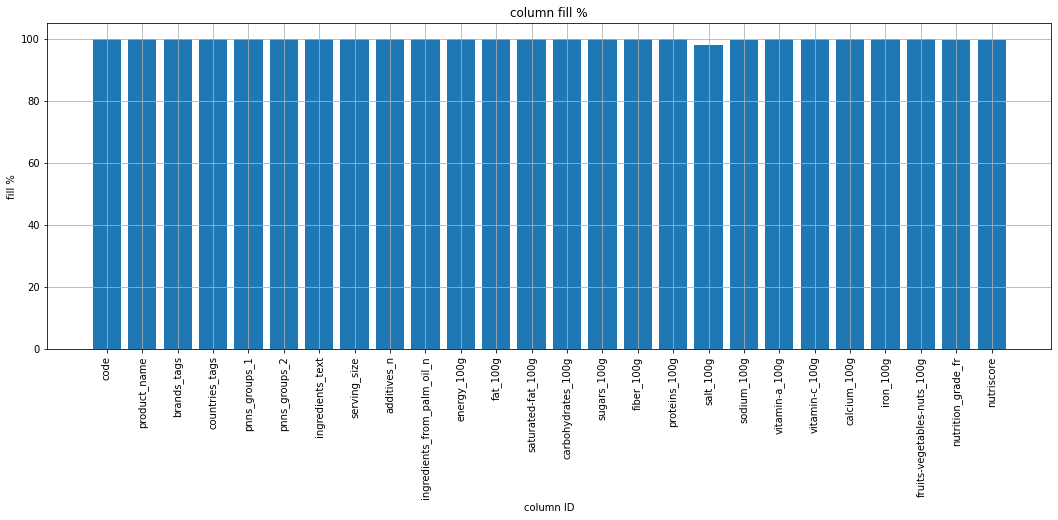

In [ ]:
plt.figure(figsize=(18,6))
plt.xticks(rotation='vertical')
plt.bar(df.columns, 100*(1-df.isna().mean()))
plt.xlabel('column ID')
plt.ylabel('fill %')
plt.grid()
plt.title('column fill %')

In [ ]:
df.isna().mean()

code                           0.000000
product_name                   0.000000
brands_tags                    0.000000
countries_tags                 0.000000
pnns_groups_1                  0.000000
pnns_groups_2                  0.000000
ingredients_text               0.000000
serving_size                   0.000000
additives_n                    0.000000
ingredients_from_palm_oil_n    0.000000
energy_100g                    0.000000
fat_100g                       0.000000
saturated-fat_100g             0.000000
carbohydrates_100g             0.000000
sugars_100g                    0.000000
fiber_100g                     0.000000
proteins_100g                  0.000000
salt_100g                      0.020078
sodium_100g                    0.006071
vitamin-a_100g                 0.000000
vitamin-c_100g                 0.000000
calcium_100g                   0.000000
iron_100g                      0.000000
fruits-vegetables-nuts_100g    0.000000
nutrition_grade_fr             0.006071


**Remplissage du restant des cases manquantes :** sel et sodium par la mediane, nutriscore par la mediane et nutrition_grade par la lettre correspondant au score median

In [ ]:
df['nutriscore'].median()

9.0

In [ ]:
df['salt_100g'] = df['salt_100g'].fillna(df['salt_100g'].median())
df['sodium_100g'] = df['sodium_100g'].fillna(df['sodium_100g'].median())
df['nutriscore'] = df['nutriscore'].fillna(df['nutriscore'].median())
df['nutrition_grade_fr'] = df['nutrition_grade_fr'].fillna('c')

**Etat des lieux :**

In [ ]:
df

,code,product_name,brands_tags,countries_tags,pnns_groups_1,pnns_groups_2,ingredients_text,serving_size,additives_n,ingredients_from_palm_oil_n,...,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,fruits-vegetables-nuts_100g,nutrition_grade_fr,nutriscore
1,4530,Banana Chips Sweetened (Whole),unknown,en:united-states,unknown,unknown,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,0.0,...,3.57,0.00000,0.000000,0.0,0.0214,0.000,0.00129,90.0,d,14.0
2,4559,Peanuts,torn-glasser,en:united-states,unknown,unknown,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,0.0,...,17.86,0.63500,0.250000,0.0,0.0000,0.071,0.00129,90.0,b,0.0
3,16087,Organic Salted Nut Mix,grizzlies,en:united-states,unknown,unknown,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,0.0,...,17.86,1.22428,0.482000,0.0,0.0000,0.143,0.00514,70.0,d,12.0
4,16094,Organic Polenta,bob-s-red-mill,en:united-states,unknown,unknown,Organic polenta,35 g (0.25 cup),0.0,0.0,...,8.57,0.58420,0.229000,0.0,0.0000,0.000,0.00000,70.0,c,9.0
5,16100,Breadshop Honey Gone Nuts Granola,unfi,en:united-states,unknown,unknown,"Rolled oats, grape concentrate, expeller press...",52 g (0.5 cup),0.0,0.0,...,13.46,0.58420,0.229000,0.0,0.0000,0.038,0.00346,70.0,c,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320756,989898,Test NF App,unknown,en:switzerland,unknown,unknown,"Coco, choco",unknown,0.0,0.0,...,2.10,1.10000,0.433071,0.0,0.0000,0.000,0.00000,70.0,d,15.0
320757,9900000000233,Amandes,biosic,en:france,unknown,unknown,unknown,unknown,1.0,0.0,...,21.22,0.10000,0.039370,0.0,0.0000,0.000,0.00000,70.0,b,0.0
320763,99111250,Thé vert Earl grey,lobodis,en:france,Beverages,Non-sugared beverages,"thé vert, arôme naturel bergamote avec autres ...",unknown,0.0,0.0,...,0.50,0.02540,0.010000,0.0,0.0000,0.000,0.00000,20.0,c,1.0
320768,99567453,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",trader-joe-s,en:united-states,unknown,unknown,"Organic peppermint, organic lemon grass, organ...",20 g (0.7 oz),0.0,0.0,...,0.00,0.00000,0.000000,0.0,0.0000,0.000,0.00000,20.0,b,0.0


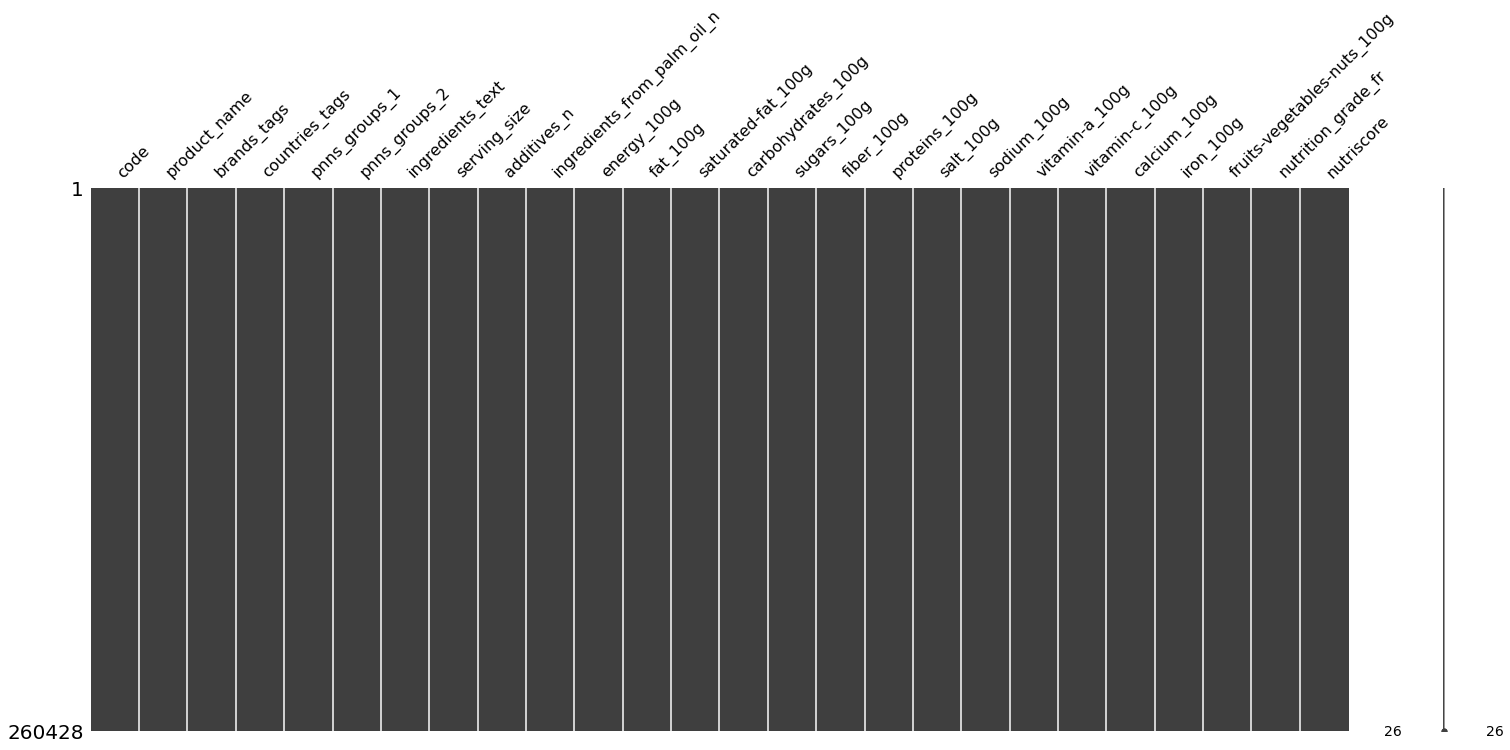

In [ ]:
msno.matrix(df)

In [ ]:
df.to_csv("drive/MyDrive/CSV/open_food_facts_bis.csv", index=False)